In [1]:
#Project 1, Part 2
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [49]:
#Define Prescribed Temperatures
T_t = 1000
T_b = 350

In [50]:
#Define Dimensions
w = 0.1
l = 0.1

In [51]:
#Define the number of x & y divisions
xdiv = 4
ydiv = 4
#Define linear spaces for x and y
x = np.linspace(0,l,xdiv)
y = np.linspace(0,w,ydiv)

In [52]:
#Make an empty coefficient matrix
A = np.zeros(shape=(xdiv*ydiv, xdiv*ydiv))
#Make an empty vector
B = np.zeros(shape=(xdiv*ydiv, 1))

In [53]:
#Assign values to the empty matrix and vector for each node
#Checks for an edge condition, where the value is directly assigned
#If not, applies the finite difference method, eqn. 4.29
for i in range(xdiv*ydiv):
    if i <= xdiv:
        A[i,i] = 1
        B[i,0] = T_t
    elif i >= ((xdiv*ydiv)-(xdiv)+1):
        A[i,i] = 1
        B[i,0] = T_b
    elif (i%xdiv) == 0:
        A[i,i] = 1
        B[i,0] = T_b
    elif ((i-1)%xdiv) == 0:
        A[i,i] = 1
        B[i,0] = T_b
    else:
        B[i,0]=0
        A[i,i]=4
        A[i,i+1]=-1
        A[i,i-1]=-1
        A[i,i+xdiv]=-1
        A[i,i-xdiv]=-1

In [54]:
#Find the vector C such that AC=B
C = np.linalg.solve(A,B)
#Rearrange into a 4x4 matrix
D = np.resize(C,(4,4))
#Flip the matrix to the correct orientation
D = np.flipud(D)
print(D)

[[ 350.    350.    350.    350.  ]
 [ 350.    350.    431.25  431.25]
 [1000.    350.    593.75  593.75]
 [1000.   1000.   1000.   1000.  ]]


Text(0.5, 1.0, '4 x 4 Grid FDM Solution')

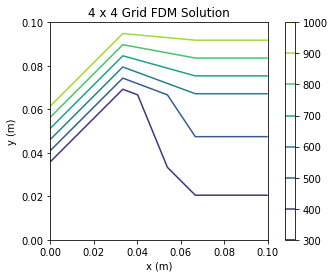

In [56]:
#Make a 2D Contour Plot
plt.contour(x,y,D)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title('4 x 4 Grid FDM Solution')